# Primary Analysis of Dataset

We have collected tweets using Twitter API and annotated 100 Tweets based on following __Topics__:

1.    Appreciation<br>
2.    Community Action<br>
3. CyberCrime<br>
4. Dissatisfaction<br>
5. Fake News<br>
6. Follow up<br>
7. Fraud<br>
8. General Info<br>
9. Police Dissatisfaction<br>
10. Query<br>
11. Suggestion<br>
12. Theft<br>
13. Traffic<br>
14. Undetermined<br>

The Topics have been chosen with thought of relevance of current affairs ,volume of Tweets recieved related to Topic as well as handling Noisy Data.

__Observations__: There are 2 major Trends which can be observed 

1. Community Actions pertaining to public reporting about Road Enroachment ,Report Abusive content on various forms of media ,Complaints from Neighbourhood related issues etc.

2. Road Safety and Traffic Management. Most of the reports were based on Road Accidents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def barPlot(x,y,xlabel,ylabel,title,file):
    plt.bar(x,y)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(x, fontsize=10, rotation=90)
    plt.title(title,fontsize=15)
    plt.savefig(file,bbox_inches="tight")
    plt.show()

(array(['Appreciation', 'Community Action', 'CyberCrime',
       'Dissatisfaction', 'Fake News', 'Follow up', 'Fraud',
       'General Info', 'Police Dissatisfaction', 'Query', 'Suggestion',
       'Theft', 'Traffic', 'Undetermined'], dtype=object), array([18, 19,  3,  1,  5,  6,  8,  7,  1,  6,  2,  4, 18,  5]))


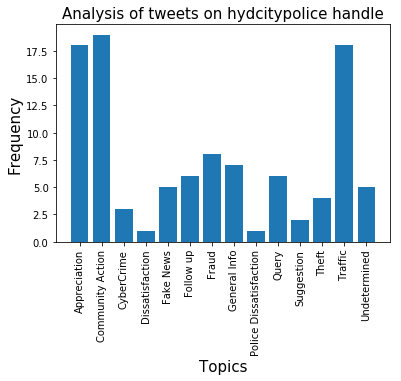

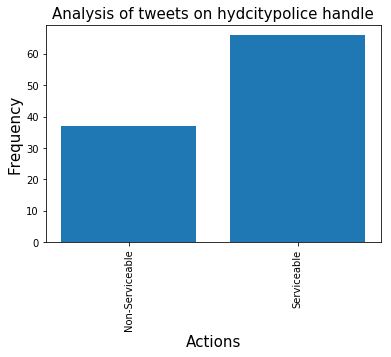

In [59]:
data=pd.read_csv("tweets.csv",header=None).values
x=np.unique(data[:,0],return_counts=True)
print(x)
barPlot(x[0],x[1],"Topics","Frequency","Analysis of tweets on hydcitypolice handle","graph1")
dataCat=["Serviceable" if x=="S" else "Non-Serviceable" for x in data[:,1]]
x1=np.unique(dataCat,return_counts=True)
barPlot(x1[0],x1[1],"Actions","Frequency","Analysis of tweets on hydcitypolice handle","graph2")

### Severity on Basis of Emotions

Following Tweets were analysed for Emotional Attribute Measures

1.  "Instagram account Shoppers Kart is doing all sorts of online fraud and cheating innocent people.He makes the Instagram users to pay advnce and blocks them once he receives payment.Plz take a serious action on him sir"
<br>

> "disgust": 0.461023,"anger": 0.422057   <br>
> Police Response : Yes
<br>

2.  "there is patient at my home but how these people making us in trouble at midnight...can i expect action"
<br>

> "disgust": 0.32599,
>                    "anger": 0.338764 <br>
> Police Response : Yes
<br>

2.  "Can you take some action against this TV channel for misguiding the civilians with this news. They cant even differenciate @narendramodi official twitter account and spreading fake news."
<br>

>"disgust": 0.355119,
>        "anger": 0.224149 <br>
> Police Response : No
<br>

3.   "One can hide a pain behind a smile .Cops need to eke out that hidden pain to turn a smile into a permanent glee - always" 
<br>

> "disgust": 0.012144,
> "anger": 0.092993,<br>
> Police Response : No
<br>


Conclusion : Police Responded on threshold value of Anger Measure of :0.3 and disgust Measure: 0.3

In [14]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2018-11-16',
    iam_apikey='TQHgzc_QZ5w9hjhnYdFkWN0lrJk4AaXB4PkJXltCL-fA',
    url='https://gateway-lon.watsonplatform.net/natural-language-understanding/api'
)

response2 = natural_language_understanding.analyze(
    text='Instagram account Shoppers Kart is doing all sorts of online fraud and cheating innocent people.He makes the Instagram users to pay advnce and blocks them once he receives payment.Plz take a serious action on him sir',
    features=Features(emotion=EmotionOptions(targets=['to']))).get_result()

print(json.dumps(response2, indent=2))



{
  "usage": {
    "text_units": 1,
    "text_characters": 216,
    "features": 1
  },
  "language": "en",
  "emotion": {
    "targets": [
      {
        "text": "to",
        "emotion": {
          "sadness": 0.360901,
          "joy": 0.021787,
          "fear": 0.023928,
          "disgust": 0.461023,
          "anger": 0.422057
        }
      }
    ],
    "document": {
      "emotion": {
        "sadness": 0.360901,
        "joy": 0.021787,
        "fear": 0.023928,
        "disgust": 0.461023,
        "anger": 0.422057
      }
    }
  }
}


In [17]:
response5 = natural_language_understanding.analyze(
    text='there is patient at my home but how these people making us in trouble at midnight...can i expect action',
    features=Features(emotion=EmotionOptions(targets=['in']))).get_result()

print(json.dumps(response5, indent=5))
e

{
     "usage": {
          "text_units": 1,
          "text_characters": 103,
          "features": 1
     },
     "language": "en",
     "emotion": {
          "targets": [
               {
                    "text": "in",
                    "emotion": {
                         "sadness": 0.498339,
                         "joy": 0.058058,
                         "fear": 0.148123,
                         "disgust": 0.178344,
                         "anger": 0.308866
                    }
               }
          ],
          "document": {
               "emotion": {
                    "sadness": 0.339063,
                    "joy": 0.049983,
                    "fear": 0.096355,
                    "disgust": 0.32599,
                    "anger": 0.338764
               }
          }
     }
}


NameError: name 'e' is not defined

In [15]:
response4 = natural_language_understanding.analyze(
    text='Can you take some action against this TV channel for misguiding the civilians with this news. They cant even differenciate @narendramodi official twitter account and spreading fake news.',
    features=Features(emotion=EmotionOptions(targets=['and']))).get_result()

print(json.dumps(response4, indent=2))


{
  "usage": {
    "text_units": 1,
    "text_characters": 186,
    "features": 1
  },
  "language": "en",
  "emotion": {
    "targets": [
      {
        "text": "and",
        "emotion": {
          "sadness": 0.647595,
          "joy": 0.058616,
          "fear": 0.079323,
          "disgust": 0.246645,
          "anger": 0.203996
        }
      }
    ],
    "document": {
      "emotion": {
        "sadness": 0.583243,
        "joy": 0.038668,
        "fear": 0.036235,
        "disgust": 0.355119,
        "anger": 0.224149
      }
    }
  }
}


In [18]:
response3 = natural_language_understanding.analyze(
    text='One can hide a pain behind a smile .Cops need to eke out that hidden pain to turn a smile into a permanent glee - always !',
    features=Features(emotion=EmotionOptions(targets=['a']))).get_result()

print(json.dumps(response3, indent=2))


{
  "usage": {
    "text_units": 1,
    "text_characters": 122,
    "features": 1
  },
  "language": "en",
  "emotion": {
    "targets": [
      {
        "text": "a",
        "emotion": {
          "sadness": 0.66962,
          "joy": 0.223594,
          "fear": 0.140398,
          "disgust": 0.015705,
          "anger": 0.081832
        }
      }
    ],
    "document": {
      "emotion": {
        "sadness": 0.599698,
        "joy": 0.293893,
        "fear": 0.115315,
        "disgust": 0.012144,
        "anger": 0.092993
      }
    }
  }
}
